In [2]:
import numpy as np
import matplotlib.pyplot as plt

import random
random.seed(1)

# Numerical Integration Investigation

In this example, we will investigate a few different methods of numerical integration.  We will use the following function as our test case:

$$y = \frac{3}{2}(1-x^2)$$

We will integrate this function from $x=0$ to $x=1$.

The exact value of the integral is:

$$\int_0^1 y dx = 1$$

In [3]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

## Rectangular Integration

The simplest method of numerical integration is the rectangular method.  In this method, we divide the interval into $n$ equal parts, and evaluate the function at the midpoint of each interval.  The area of each rectangle is then the function value at the midpoint times the width of the interval.  The total area is the sum of the areas of all the rectangles.  The error in this method is proportional to the width of the interval, so the error decreases as $n$ increases.  The error is also proportional to the second derivative of the function, so the error decreases as the function becomes smoother.

We will consider n values of $n$ from $10^2$ to $10^6$.

In [8]:
max_order = 6
min_order = 2
nbins = 20

norders = max_order - min_order + 1
nbin = nbins

npts = np.zeros(norders)
print (np)
enp = np.zeros(norders)
sum2 = np.zeros(norders)
esum2 = np.zeros(norders)
esum3 = np.zeros(norders)
np2 = np.zeros(norders)
np3 = np.zeros(norders)

print (np)

sum = [[0 for x in range(0,nbin)] for y in range(0,norders)]

for j in range(min_order,max_order+1):
    npoints = 10**j
    npts[j-min_order]=npoints
    np2[j-min_order]=1.0/np.sqrt(npoints)
    np3[j-min_order]=np.log(1.0*npoints)

    for k in range(0,nbin):
        xlow = 0.0
        xhigh = 1.0
        dx = (xhigh-xlow)/npoints
        
        for i in range(0,int(npoints)):
            xval = xlow+random.random()*(xhigh-xlow)
            yval = generator_function(xval)
            sum[j-min_order][k] += dx*yval
            
    for k in range(0,nbin):
        sum2[j-min_order] += sum[j-min_order][k]/nbin
        
    for k in range(0,nbin):
        esum2[j-min_order] += (sum[j-min_order][k]-sum2[j-min_order])**2/nbin
    
    esum2[j-min_order]=np.sqrt(esum2[j-min_order])
    print("Integral = %f +/- %f for npoints = %f" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("Error = %f" %np.abs(1.0-sum2[j-min_order]))
    esum3[j-min_order]=np.log(esum2[j-min_order])
    
    

<module 'numpy' from '/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages/numpy/__init__.py'>
<module 'numpy' from '/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages/numpy/__init__.py'>
Integral = 0.986648 +/- 0.041594 for npoints = 100.000000
Error = 0.013352
Integral = 0.998263 +/- 0.011924 for npoints = 1000.000000
Error = 0.001737
Integral = 1.000082 +/- 0.003809 for npoints = 10000.000000
Error = 0.000082
Integral = 1.000157 +/- 0.001420 for npoints = 100000.000000
Error = 0.000157
Integral = 0.999933 +/- 0.000483 for npoints = 1000000.000000
Error = 0.000067


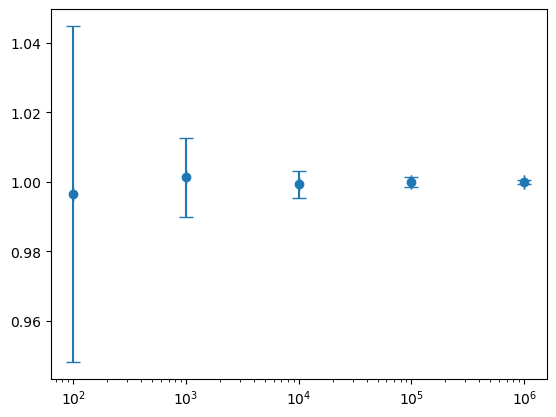

In [6]:
plt.errorbar(npts,sum2,xerr=enp,yerr=esum2,fmt='o',capsize=5)
plt.xscale("log")

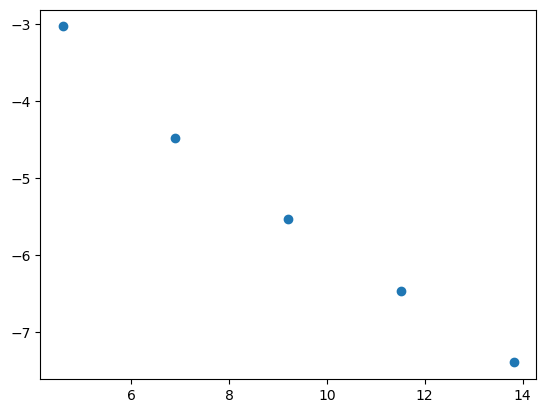

In [7]:
plt.plot(np3,esum3,'o')